In [8]:
import numpy as np
import pandas as pd 
import scipy
import scipy.io as sio
import tensorflow as tf
file_num=[71,72,73,74,75]
#df=pd.read_

In [13]:
predictions=100
samples=700
n_outputs=predictions
n_steps=25
lr=0.00001
batch_size=100
num_units=[200]
n_hidden=num_units[-1]
data_train=[]
data_test=[]
for num in file_num:
    file_name='event'+str(num)+'a1a16.mat'
    temp=sio.loadmat('batch1/'+file_name)['bus_v']
    X,Y=temp[:,200:900],temp[:,900:1000]
    data_train.append([X.reshape(list(X.shape)+[1]),Y])
data_test.append(data_train.pop())

In [15]:
with tf.device('/device:GPU:2'):
    
    tf.reset_default_graph()
    weights={
        'w':tf.Variable(tf.random_normal([n_hidden,n_outputs]))
        }
    biases={
        'b':tf.Variable(tf.random_normal([n_outputs]))
        }
    cells=tf.contrib.rnn.MultiRNNCell(
        [tf.contrib.rnn.BasicLSTMCell(num_units=nu) for nu in num_units]
        )

    X=tf.placeholder(dtype=np.float32,shape=[None,samples,1])
    Y=tf.placeholder(dtype=np.float32,shape=[None,predictions])

    outputs,_=tf.nn.dynamic_rnn(cell=cells,inputs=X,dtype=np.float32)
    outputs=tf.transpose(outputs,[1,0,2])[-1]
    y_hat=tf.matmul(outputs,weights['w'])
    y_hat=tf.nn.bias_add(y_hat,biases['b'])
    loss=tf.reduce_sum(tf.square(y_hat-Y),reduction_indices=1)
    loss=tf.reduce_mean(loss)
    pure_loss=tf.reduce_mean(loss)

    #tv=tf.trainable_variables()  
    #regularization_cost=0.005*tf.reduce_sum([tf.nn.l2_loss(v) for v in tv])
    #l1_regularizer = tf.contrib.layers.l1_regularizer(scale=0.005, scope=None)
    #regularization_cost = tf.contrib.layers.apply_regularization(l1_regularizer, tv)
    #loss+=regularization_cost

    train_op1=tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
    train_op2=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
    train_op3=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        epoch=0
        for i in range(30):
            #sess.run(train_op1,feed_dict={X:X_train,Y:Y_train})
            for [X_train,Y_train] in data_train:
                sess.run(train_op1,feed_dict={X:X_train,Y:Y_train})
            epoch+=1
            if epoch%10==0:
                #print(sess.run(loss,feed_dict={X:X_train,Y:Y_train}))
                train_loss=0.0
                test_loss=0.0
                for [X_train,Y_train] in data_train:
                    train_loss+=sess.run(loss,feed_dict={X:X_train,Y:Y_train})
                test_loss+=sess.run(loss,feed_dict={X:data_test[0][0],Y:data_test[0][1]})
                print('Epoch: ',epoch)
                print('training loss: ', train_loss)
                print('testing loss: ', test_loss)
        for i in range(80):
            epoch+=1
            #sess.run(train_op2,feed_dict={X:X_train,Y:Y_train})
            for [X_train,Y_train] in data_train:
                sess.run(train_op2,feed_dict={X:X_train,Y:Y_train})
            if epoch%10==0:
                #print(sess.run(loss,feed_dict={X:X_train,Y:Y_train}))
                train_loss=0.0
                test_loss=0.0
                for [X_train,Y_train] in data_train:
                    train_loss+=sess.run(loss,feed_dict={X:X_train,Y:Y_train})
                test_loss+=sess.run(loss,feed_dict={X:data_test[0][0],Y:data_test[0][1]})
                print('Epoch: ',epoch)
                print('training loss: ', train_loss)
                print('testing loss: ', test_loss)
        for i in range(80):
            epoch+=1
            #sess.run(train_op3,feed_dict={X:X_train,Y:Y_train})
            for [X_train,Y_train] in data_train:
                sess.run(train_op3,feed_dict={X:X_train,Y:Y_train})
            if epoch%10==0:
                #print(sess.run(pure_loss,feed_dict={X:X_train,Y:Y_train}))
                train_loss=0.0
                test_loss=0.0
                for [X_train,Y_train] in data_train:
                    train_loss+=sess.run(loss,feed_dict={X:X_train,Y:Y_train})
                test_loss+=sess.run(loss,feed_dict={X:data_test[0][0],Y:data_test[0][1]})
                print('Epoch: ',epoch)
                print('training loss: ', train_loss)
                print('testing loss: ', test_loss)
        #pred=sess.run(y_hat,feed_dict={X:X_test})
        pred1=sess.run(y_hat,feed_dict={X:data_test[0][0]})

/home/student2/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


('Epoch: ', 10)
('training loss: ', 10.806028366088867)
('testing loss: ', 2.528759241104126)
('Epoch: ', 20)
('training loss: ', 2.4096375703811646)
('testing loss: ', 0.5696830749511719)
('Epoch: ', 30)
('training loss: ', 1.3675054609775543)
('testing loss: ', 0.39306744933128357)
('Epoch: ', 40)
('training loss: ', 0.7107934877276421)
('testing loss: ', 0.2078305035829544)
('Epoch: ', 50)
('training loss: ', 0.27793296054005623)
('testing loss: ', 0.08364062011241913)
('Epoch: ', 60)
('training loss: ', 0.4372616335749626)
('testing loss: ', 0.13583625853061676)
('Epoch: ', 70)
('training loss: ', 0.11632170528173447)
('testing loss: ', 0.033546846359968185)
('Epoch: ', 80)
('training loss: ', 0.07752342335879803)
('testing loss: ', 0.025941796600818634)
('Epoch: ', 90)
('training loss: ', 0.1340000405907631)
('testing loss: ', 0.029654791578650475)
('Epoch: ', 100)
('training loss: ', 0.6975887194275856)
('testing loss: ', 0.2705136835575104)
('Epoch: ', 110)
('training loss: ', 0

In [5]:
'''
X_train=np.empty((batch_size,samples),dtype=np.float32)
Y_train=np.empty((batch_size,predictions),dtype=np.float32)


for i in range(batch_size):
    t=np.arange(0,samples+predictions)/100.0+i/float(batch_size)
    y=np.sin(2*np.pi*t)
    X_train[i,:]=y[:samples]
    Y_train[i,:]=y[samples:]
    #X_test[i,:]=t[samples:]
    #Y_test
X_train=X_train.reshape(list(X_train.shape)+[1])
sp=int(batch_size*0.8)
X_test, Y_test=X_train[sp:], Y_train[sp:]
X_train, Y_train=X_train[:sp], Y_train[:sp]
'''

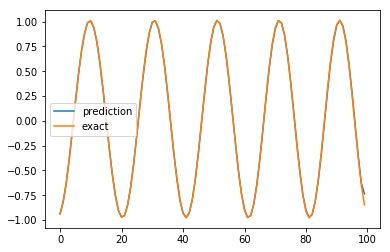

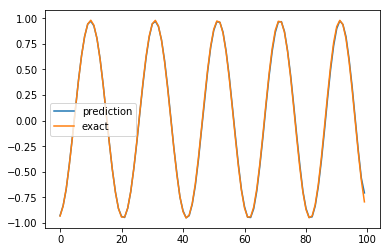

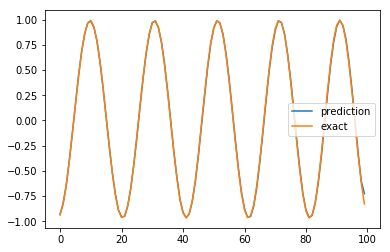

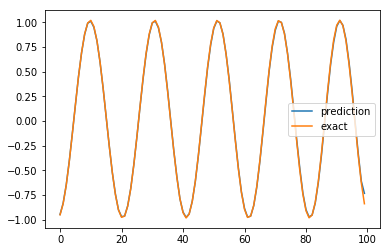

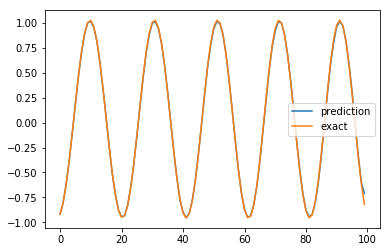

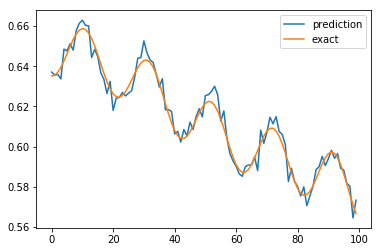

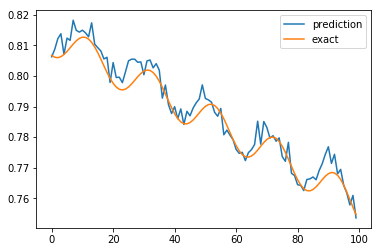

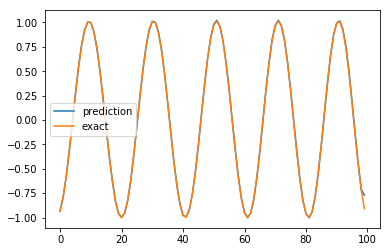

In [19]:
y=data_test[0][1]
import matplotlib.pyplot as plt
%matplotlib inline
for i in [1,5,9,15,25,32,43,56]:
    plt.plot(pred1[i,:],label='prediction')
    plt.plot(y[i,:],label='exact')
    plt.legend()
    plt.show()

In [14]:
data_test[0][0].shape

(70, 700, 1)